In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\machine learning\project clustring\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.shape

(167, 10)

In [5]:
df.drop(['country'] , axis=1).corr()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


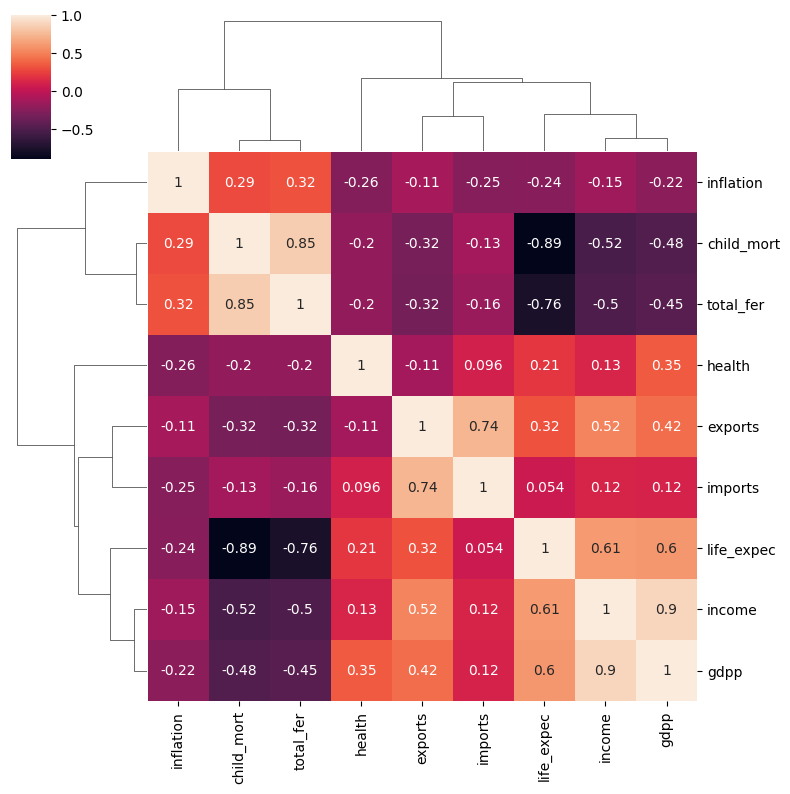

In [6]:
sns.clustermap(data = df.drop(['country'] , axis=1).corr() , annot = True , figsize = (8,8))

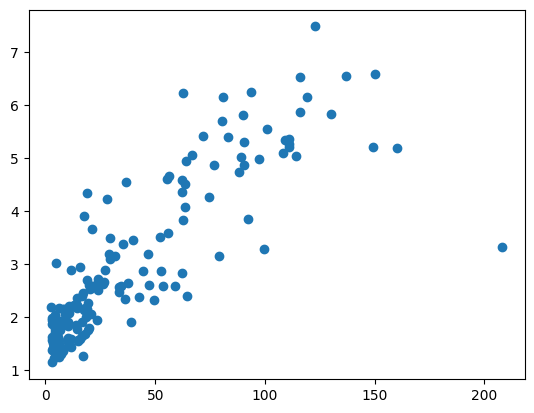

In [7]:
plt.scatter(data = df , x = 'child_mort' , y = 'total_fer')

In [8]:
X = df.iloc[: , [1,8]].values

In [9]:
X

array([[ 90.2 ,   5.82],
       [ 16.6 ,   1.65],
       [ 27.3 ,   2.89],
       [119.  ,   6.16],
       [ 10.3 ,   2.13],
       [ 14.5 ,   2.37],
       [ 18.1 ,   1.69],
       [  4.8 ,   1.93],
       [  4.3 ,   1.44],
       [ 39.2 ,   1.92],
       [ 13.8 ,   1.86],
       [  8.6 ,   2.16],
       [ 49.4 ,   2.33],
       [ 14.2 ,   1.78],
       [  5.5 ,   1.49],
       [  4.5 ,   1.86],
       [ 18.8 ,   2.71],
       [111.  ,   5.36],
       [ 42.7 ,   2.38],
       [ 46.6 ,   3.2 ],
       [  6.9 ,   1.31],
       [ 52.5 ,   2.88],
       [ 19.8 ,   1.8 ],
       [ 10.5 ,   1.84],
       [ 10.8 ,   1.57],
       [116.  ,   5.87],
       [ 93.6 ,   6.26],
       [ 44.4 ,   2.88],
       [108.  ,   5.11],
       [  5.6 ,   1.63],
       [ 26.5 ,   2.67],
       [149.  ,   5.21],
       [150.  ,   6.59],
       [  8.7 ,   1.88],
       [ 15.7 ,   1.59],
       [ 18.6 ,   2.01],
       [ 88.2 ,   4.75],
       [116.  ,   6.54],
       [ 63.9 ,   4.95],
       [ 10.2 ,   1.92],


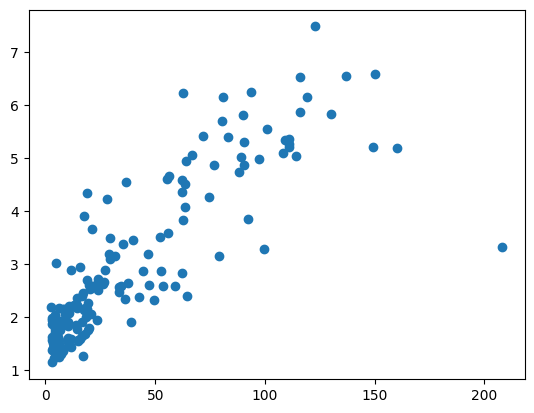

In [10]:
plt.scatter(X[: , 0] , X[: , 1])

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []
for i in range(1,10):
    k = KMeans(n_clusters = i , init = 'k-means++' , random_state=42)
    k.fit(X)
    wcss.append(k.inertia_)
wcss    

[270366.59820718557,
 67899.61214355136,
 33237.76568236989,
 19802.812678698756,
 13164.40454064815,
 10278.399733368084,
 6877.642021742455,
 4009.035599836962,
 3166.6530162557065]

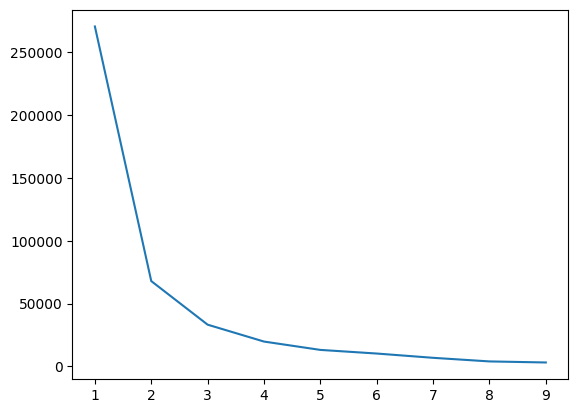

In [14]:
plt.plot(range(1,10) ,  wcss )

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters =  3 , init = 'k-means++' , random_state=42)
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [16]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0], dtype=int32)

In [17]:
pred = kmeans.predict(X)
pred

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0,
       1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0], dtype=int32)

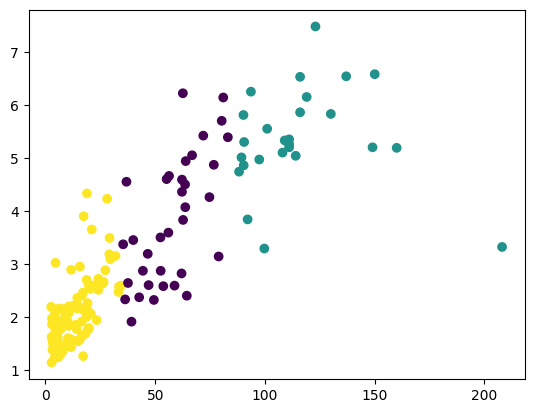

In [18]:
plt.scatter(X[: , 0] , X[: , 1] , c = kmeans.labels_)

In [19]:
kmeans.cluster_centers_

array([[ 57.74571429,   3.82971429],
       [115.55      ,   5.37846154],
       [ 12.88396226,   2.06066038]])

In [20]:
kmeans.inertia_

33237.76568236989

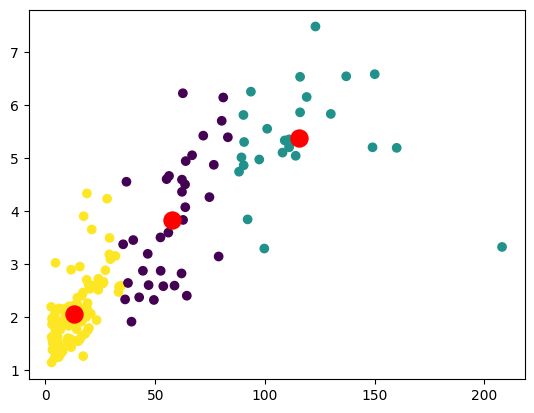

In [21]:
plt.scatter(X[: , 0] , X[: , 1] , c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , c = 'r' , s = 150)

In [22]:
X

array([[ 90.2 ,   5.82],
       [ 16.6 ,   1.65],
       [ 27.3 ,   2.89],
       [119.  ,   6.16],
       [ 10.3 ,   2.13],
       [ 14.5 ,   2.37],
       [ 18.1 ,   1.69],
       [  4.8 ,   1.93],
       [  4.3 ,   1.44],
       [ 39.2 ,   1.92],
       [ 13.8 ,   1.86],
       [  8.6 ,   2.16],
       [ 49.4 ,   2.33],
       [ 14.2 ,   1.78],
       [  5.5 ,   1.49],
       [  4.5 ,   1.86],
       [ 18.8 ,   2.71],
       [111.  ,   5.36],
       [ 42.7 ,   2.38],
       [ 46.6 ,   3.2 ],
       [  6.9 ,   1.31],
       [ 52.5 ,   2.88],
       [ 19.8 ,   1.8 ],
       [ 10.5 ,   1.84],
       [ 10.8 ,   1.57],
       [116.  ,   5.87],
       [ 93.6 ,   6.26],
       [ 44.4 ,   2.88],
       [108.  ,   5.11],
       [  5.6 ,   1.63],
       [ 26.5 ,   2.67],
       [149.  ,   5.21],
       [150.  ,   6.59],
       [  8.7 ,   1.88],
       [ 15.7 ,   1.59],
       [ 18.6 ,   2.01],
       [ 88.2 ,   4.75],
       [116.  ,   6.54],
       [ 63.9 ,   4.95],
       [ 10.2 ,   1.92],


In [23]:
from sklearn.cluster import AgglomerativeClustering
ggllo = AgglomerativeClustering()
ggllo.fit(X)

,"n_clusters n_clusters: int or None, default=2The number of clusters to find. It must be ``None`` if``distance_threshold`` is not ``None``.",2
,"metric metric: str or callable, default=""euclidean""Metric used to compute the linkage. Can be ""euclidean"", ""l1"", ""l2"",""manhattan"", ""cosine"", or ""precomputed"". If linkage is ""ward"", only""euclidean"" is accepted. If ""precomputed"", a distance matrix is neededas input for the fit method. If connectivity is None, linkage is""single"" and affinity is not ""precomputed"" any valid pairwise distancemetric can be assigned.For an example of agglomerative clustering with different metrics, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_clustering_metrics.py`... versionadded:: 1.2",'euclidean'
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the output of the computation of the tree.By default, no caching is done. If a string is given, it is thepath to the caching directory.",None
,"connectivity connectivity: array-like, sparse matrix, or callable, default=NoneConnectivity matrix. Defines for each sample the neighboringsamples following a given structure of the data.This can be a connectivity matrix itself or a callable that transformsthe data into a connectivity matrix, such as derived from`kneighbors_graph`. Default is ``None``, i.e, thehierarchical clustering algorithm is unstructured.For an example of connectivity matrix using:class:`~sklearn.neighbors.kneighbors_graph`, see:ref:`sphx_glr_auto_examples_cluster_plot_ward_structured_vs_unstructured.py`.",None
,"compute_full_tree compute_full_tree: 'auto' or bool, default='auto'Stop early the construction of the tree at ``n_clusters``. This isuseful to decrease computation time if the number of clusters is notsmall compared to the number of samples. This option is useful onlywhen specifying a connectivity matrix. Note also that when varying thenumber of clusters and using caching, it may be advantageous to computethe full tree. It must be ``True`` if ``distance_threshold`` is not``None``. By default `compute_full_tree` is ""auto"", which is equivalentto `True` when `distance_threshold` is not `None` or that `n_clusters`is inferior to the maximum between 100 or `0.02 * n_samples`.Otherwise, ""auto"" is equivalent to `False`.",'auto'
,"linkage linkage: {'ward', 'complete', 'average', 'single'}, default='ward'Which linkage criterion to use. The linkage criterion determines whichdistance to use between sets of observation. The algorithm will mergethe pairs of cluster that minimize this criterion.- 'ward' minimizes the variance of the clusters being merged.- 'average' uses the average of the distances of each observation of the two sets.- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.- 'single' uses the minimum of the distances between all observations of the two sets... versionadded:: 0.20 Added the 'single' optionFor examples comparing different `linkage` criteria, see:ref:`sphx_glr_auto_examples_cluster_plot_linkage_comparison.py`.",'ward'
,"distance_threshold distance_threshold: float, default=NoneThe linkage distance threshold at or above which clusters will not bemerged. If not ``None``, ``n_clusters`` must be ``None`` and``compute_full_tree`` must be ``True``... versionadded:: 0.21",None
,"compute_distances compute_distances: bool, default=FalseComputes distances between clusters even if `distance_threshold` is notused. This can be used to make dendrogram visualization, but introducesa computational and memory overhead... versionadded:: 0.24For an example of dendrogram visualization, see:ref:`sphx_glr_auto_examples_cluster_plot_agglomerative_dendrogram.py`.",False


In [24]:
ggllo.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [25]:
predict = ggllo.fit_predict(X)

In [26]:
predict

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

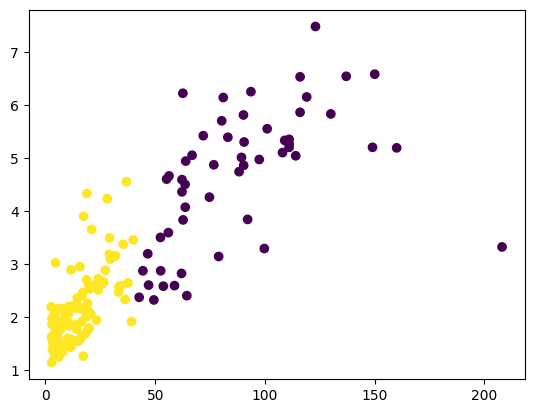

In [27]:
plt.scatter(X[: , 0] , X[: , 1] , c = ggllo.labels_)

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
outlier_percent = []

for eps in np.linspace(0.001,4,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*X.shape[1])
    dbscan.fit(X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

<Axes: >

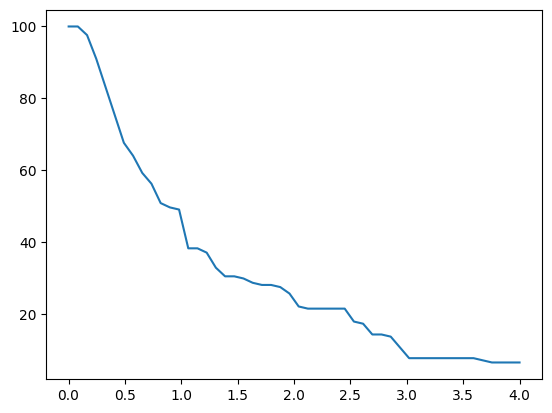

In [30]:
sns.lineplot(x=np.linspace(0.001,4,50),y=outlier_percent)


In [31]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(X)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [32]:
dbc = DBSCAN(eps = 3)
dbc.fit(X)

,"eps eps: float, default=0.5The maximum distance between two samples for one to be consideredas in the neighborhood of the other. This is not a maximum boundon the distances of points within a cluster. This is the mostimportant DBSCAN parameter to choose appropriately for your data setand distance function. Smaller values generally lead to more clusters.",3
,"min_samples min_samples: int, default=5The number of samples (or total weight) in a neighborhood for a point tobe considered as a core point. This includes the point itself. If`min_samples` is set to a higher value, DBSCAN will find denser clusters,whereas if it is set to a lower value, the found clusters will be moresparse.",5
,"metric metric: str, or callable, default='euclidean'The metric to use when calculating distance between instances in afeature array. If metric is a string or callable, it must be one ofthe options allowed by :func:`sklearn.metrics.pairwise_distances` forits metric parameter.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors for DBSCAN... versionadded:: 0.17 metric *precomputed* to accept precomputed sparse matrix.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function... versionadded:: 0.19",None
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'The algorithm to be used by the NearestNeighbors moduleto compute pointwise distances and find nearest neighbors.'auto' will attempt to decide the most appropriate algorithmbased on the values passed to :meth:`fit` method.See :class:`~sklearn.neighbors.NearestNeighbors` documentation fordetails.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or cKDTree. This can affect the speedof the construction and query, as well as the memory requiredto store the tree. The optimal value dependson the nature of the problem.",30
,"p p: float, default=NoneThe power of the Minkowski metric to be used to calculate distancebetween points. If None, then ``p=2`` (equivalent to the Euclideandistance). When p=1, this is equivalent to Manhattan distance.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None


In [33]:
dbc.labels_

array([ 0,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        3, -1, -1,  1,  4,  1,  1,  1, -1,  0, -1,  3,  1,  1, -1, -1,  1,
        1,  1,  0, -1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  3,  4,
        1,  1,  1,  1,  2, -1,  1,  1, -1,  1,  1,  1,  3, -1,  1, -1,  1,
        1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1, -1,
        1,  1, -1,  0,  1,  1,  1,  1,  2,  0,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  2,  4, -1,  1,  1, -1, -1,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1, -1,  1,  1,  1,
        1,  4,  1,  1,  1,  1, -1,  1,  1,  1,  4, -1,  1,  2,  0,  1,  1,
        1,  2, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4, -1])

In [34]:
dbc.fit_predict(X)

array([ 0,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        3, -1, -1,  1,  4,  1,  1,  1, -1,  0, -1,  3,  1,  1, -1, -1,  1,
        1,  1,  0, -1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  3,  4,
        1,  1,  1,  1,  2, -1,  1,  1, -1,  1,  1,  1,  3, -1,  1, -1,  1,
        1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1, -1,
        1,  1, -1,  0,  1,  1,  1,  1,  2,  0,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  2,  4, -1,  1,  1, -1, -1,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1, -1,  1,  1,  1,
        1,  4,  1,  1,  1,  1, -1,  1,  1,  1,  4, -1,  1,  2,  0,  1,  1,
        1,  2, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4, -1])

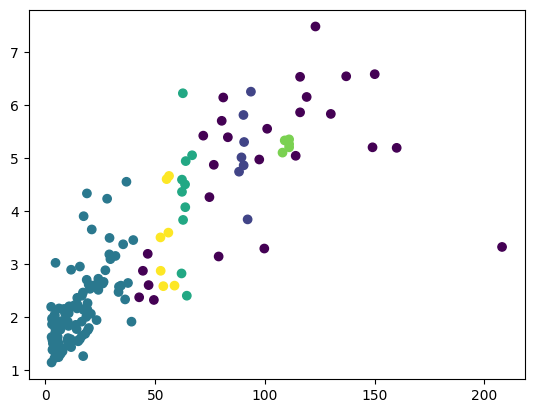

In [35]:
plt.scatter(data = df , x = 'child_mort' , y = 'total_fer' , c = dbc.labels_ )